In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [6]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [7]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv("mouse_drug_data.csv")
clinic_trial_df = pd.read_csv("clinicaltrial_data.csv")

display(mouse_drug_df.head())
display(clinic_trial_df.head())

Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [8]:
# Combine the data into a single dataset
merged_df = pd.merge(clinic_trial_df, mouse_drug_df, how='outer', on='Mouse ID')
display(merged_df.head())

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupbydrugntime = merged_df.groupby(["Drug", "Timepoint"])
meantumorvol = groupbydrugntime["Tumor Volume (mm3)"].mean()
meantumorvol

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [10]:
# Convert to DataFrame
grouped_df = pd.DataFrame({"Mean Tumor Volume" : meantumorvol})
# Preview DataFrame
Tumormean_df = pd.DataFrame(grouped_df.reset_index())
#grouped_df.head()
Tumormean_df.head()

Drug  Timepoint  Mean Tumor Volume
0  Capomulin          0          45.000000
1  Capomulin          5          44.266086
2  Capomulin         10          43.084291
3  Capomulin         15          42.064317
4  Capomulin         20          40.716325

In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumvolse = groupbydrugntime["Tumor Volume (mm3)"].sem()
tumvolse

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
                          ...   
Zoniferol  25           0.602513
           30           0.800043
           35           0.881426
           40           0.998515
           45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [12]:
grouped_df2 = pd.DataFrame({"Std Error Tumor Volume" : tumvolse})
# Preview DataFrame
grouped_df2.reset_index()
TumorSE_df = pd.DataFrame(grouped_df2.reset_index())
# Preview DataFrame
TumorSE_df.head()

Drug  Timepoint  Std Error Tumor Volume
0  Capomulin          0                0.000000
1  Capomulin          5                0.448593
2  Capomulin         10                0.702684
3  Capomulin         15                0.838617
4  Capomulin         20                0.909731

In [13]:
# Minor Data Munging to Re-Format the Data Frames
#grouped_df.set_index("Timepoint")
matrix1 = Tumormean_df.pivot(index="Timepoint", columns="Drug", values="Mean Tumor Volume")

# Preview that Reformatting worked
matrix1

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

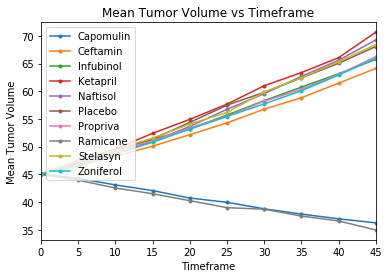

In [80]:
# Generate the Plot (with Error Bars)

Tumormean_df2 = pd.DataFrame(Tumormean_df.set_index(['Timepoint']))
#display(Tumormean_df2)
lines = matrix1.plot.line(style='.-')
plt.title("Mean Tumor Volume vs Timeframe")
plt.xlabel("Timeframe")
plt.ylabel("Mean Tumor Volume")
plt.legend(loc="upper left")

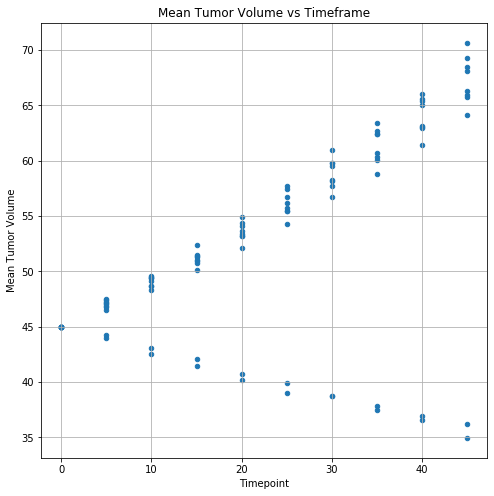

In [92]:
Tumormean_df.plot(kind="scatter", x="Timepoint", y="Mean Tumor Volume", grid=True, figsize=(8,8),
              title="Mean Tumor Volume vs Timeframe")


<ErrorbarContainer object of 3 artists>

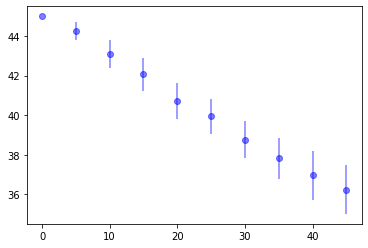

In [114]:
x_axis = Tumormean_df["Timepoint"].unique()
x_axis
y_axis = Tumormean_df["Mean Tumor Volume"].loc[Tumormean_df["Drug"]=="Capomulin"]
y_axis
sems = TumorSE_df["Std Error Tumor Volume"].loc[TumorSE_df["Drug"]=="Capomulin"]
sems

fig, ax = plt.subplots()
ax.errorbar(x_axis, y_axis, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean Tumor Volume")
#ax.set_xlim(0, len(means)+1)
#ax.set_xlabel("Sample Number")
#ax.set_ylabel("Mean of Median House Prices ($1000)")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()



# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

In [125]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#groupbydrugntime = merged_df.groupby(["Drug", "Timepoint"])
meanmet = groupbydrugntime["Metastatic Sites"].mean()
meanmet

# Convert to DataFrame
groupedmet_df = pd.DataFrame({"Mean Metastic Sites" : meanmet})

# Preview DataFrame
display(groupedmet_df)

Metmean_df = pd.DataFrame(groupedmet_df.reset_index())
#grouped_df.head()
Metmean_df.head()

Mean Metastic Sites
Drug      Timepoint                     
Capomulin 0                     0.000000
          5                     0.160000
          10                    0.320000
          15                    0.375000
          20                    0.652174
...                                  ...
Zoniferol 25                    1.687500
          30                    1.933333
          35                    2.285714
          40                    2.785714
          45                    3.071429

[100 rows x 1 columns]

Drug  Timepoint  Mean Metastic Sites
0  Capomulin          0             0.000000
1  Capomulin          5             0.160000
2  Capomulin         10             0.320000
3  Capomulin         15             0.375000
4  Capomulin         20             0.652174

In [126]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metse = groupbydrugntime["Metastatic Sites"].sem()
Metse
# Convert to DataFrame
groupedmet_df3 = pd.DataFrame({"Metastatic Sites Std Error" : Metse})

# Preview DataFrame
groupedmet_df3

Metastatic Sites Std Error
Drug      Timepoint                            
Capomulin 0                            0.000000
          5                            0.074833
          10                           0.125433
          15                           0.132048
          20                           0.161621
...                                         ...
Zoniferol 25                           0.236621
          30                           0.248168
          35                           0.285714
          40                           0.299791
          45                           0.286400

[100 rows x 1 columns]

In [137]:
groupedmet_df3.reset_index()
MetSE_df = pd.DataFrame(groupedmet_df3.reset_index())
# Preview DataFrame
MetSE_df.head()
# Minor Data Munging to Re-Format the Data Frames
matrix2 = Metmean_df.pivot(index="Timepoint", columns="Drug", values="Mean Metastic Sites")

# Preview that Reformatting worked
matrix2


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   
25          0.818182  1.500000   1.277778  1.631579  1.500000  1.941176   
30          1.090909  1.937500   1.588235  2.055556  2.066667  2.266667   
35          1.181818  2.071429   1.666667  2.294118  2.266667  2.642857   
40          1.380952  2.357143   2.100000  2.733333  2.466667  3.166667   
45          1.476190  2.692308   2.111111  3.363636  2.538462  3.272727   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118  
25         1.357143  0.652174  1.157895   1.687500  
30         1.615385  0.782609  1.388889   1.933333  
35         2.300000  0.952381  1.562500   2.285714  
40         2.777778  1.100000  1.583333   2.785714  
45         2.571429  1.250000  1.727273   3.071429

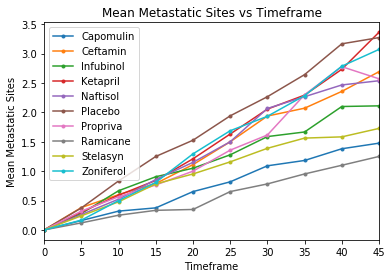

In [141]:
# Generate the Plot (with Error Bars)

Metmean_df2 = pd.DataFrame(Metmean_df.set_index(['Timepoint']))
#display(Tumormean_df2)
lines = matrix2.plot.line(style='.-')
plt.title("Mean Metastatic Sites vs Timeframe")
plt.xlabel("Timeframe")
plt.ylabel("Mean Metastatic Sites")
plt.legend(loc="upper left")

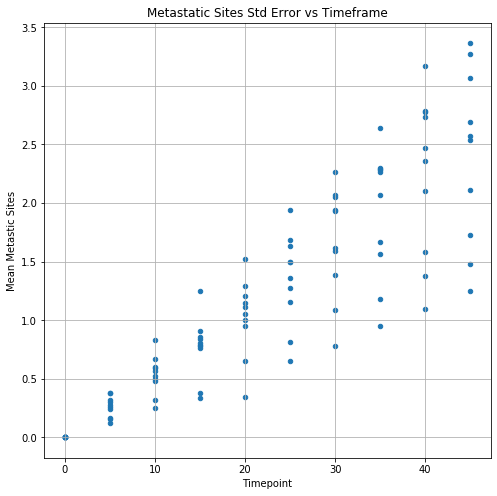

In [130]:
Metmean_df.plot(kind="scatter", x="Timepoint", y="Mean Metastic Sites", grid=True, figsize=(8,8),
              title="Metastatic Sites Std Error vs Timeframe")

<ErrorbarContainer object of 3 artists>

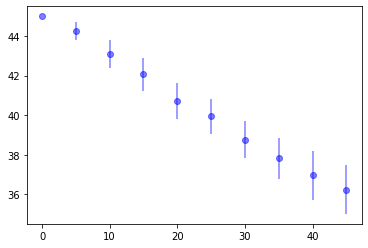

In [133]:
x_axis2 = Metmean_df["Timepoint"].unique()
x_axis2
y_axis2 = Metmean_df["Mean Metastic Sites"].loc[Metmean_df["Drug"]=="Capomulin"]
y_axis2
sems2 = MetSE_df["Metastatic Sites Std Error"].loc[MetSE_df["Drug"]=="Capomulin"]
sems2

fig, ax = plt.subplots()
ax.errorbar(x_axis, y_axis, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean Metastasic Sites")
#ax.set_xlim(0, len(means)+1)
#ax.set_xlabel("Sample Number")
#ax.set_ylabel("Mean of Median House Prices ($1000)")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()



# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

In [139]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#groupbydrugntime = merged_df.groupby(["Drug", "Timepoint"])
countmice = groupbydrugntime["Mouse ID"].count()
countmice

# Convert to DataFrame
groupedmice_df = pd.DataFrame({"Mice Survived" : countmice})

# Preview DataFrame
display(groupedmice_df)

Micesurv_df = pd.DataFrame(groupedmice_df.reset_index())
#grouped_df.head()
Micesurv_df.head()


Mice Survived
Drug      Timepoint               
Capomulin 0                     25
          5                     25
          10                    25
          15                    24
          20                    23
...                            ...
Zoniferol 25                    16
          30                    15
          35                    14
          40                    14
          45                    14

[100 rows x 1 columns]

Drug  Timepoint  Mice Survived
0  Capomulin          0             25
1  Capomulin          5             25
2  Capomulin         10             25
3  Capomulin         15             24
4  Capomulin         20             23

In [140]:
# Minor Data Munging to Re-Format the Data Frames
matrix3 = Micesurv_df.pivot(index="Timepoint", columns="Drug", values="Mice Survived")

# Preview that Reformatting worked
matrix3

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17  
25               14        23        19         16  
30               13        23        18         15  
35               10        21        16         14  
40                9        20        12         14  
45                7        20        11         14

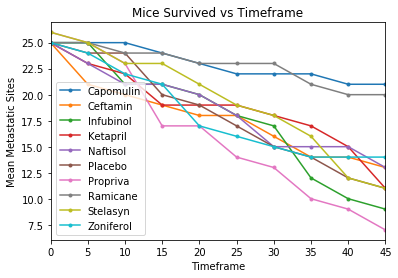

In [143]:
Micesurv_df2 = pd.DataFrame(Micesurv_df.set_index(['Timepoint']))
#display(Tumormean_df2)
lines = matrix3.plot.line(style='.-')
plt.title("Mice Survived vs Timeframe")
plt.xlabel("Timeframe")
plt.ylabel("Mean Metastatic Sites")
plt.legend(loc="lower left")

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0               1.00      1.00       1.00      1.00      1.00     1.00   
5               1.00      0.84       1.00      0.92      0.92     0.96   
10              1.00      0.80       0.84      0.88      0.84     0.96   
15              0.96      0.76       0.84      0.76      0.84     0.80   
20              0.92      0.72       0.80      0.76      0.80     0.76   
25              0.88      0.72       0.72      0.76      0.72     0.68   
30              0.88      0.64       0.68      0.72      0.60     0.60   
35              0.88      0.56       0.48      0.68      0.60     0.56   
40              0.84      0.56       0.40      0.60      0.60     0.48   
45              0.84      0.52       0.36      0.44      0.52     0.44   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0              1.04      1.00      1.04       1.00  
5              1.00      1.00      1.00       0.96  
10             0.92      0.96      0.92       0.88  
15             0.68      0.96      0.92       0.84  
20             0.68      0.92      0.84       0.68  
25             0.56      0.92      0.76       0.64  
30             0.52      0.92      0.72       0.60  
35             0.40      0.84      0.64       0.56  
40             0.36      0.80      0.48       0.56  
45             0.28      0.80      0.44       0.56

Drug  Mice Survived %
Timepoint                            
0          Capomulin             1.00
5          Capomulin             1.00
10         Capomulin             1.00
15         Capomulin             0.96
20         Capomulin             0.92
...              ...              ...
25         Zoniferol             0.64
30         Zoniferol             0.60
35         Zoniferol             0.56
40         Zoniferol             0.56
45         Zoniferol             0.56

[100 rows x 2 columns]

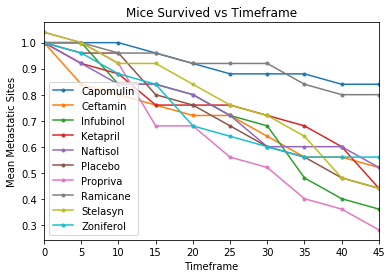

In [163]:
# Calculate the percent changes for each drug

#for i in Drug:
    #for j in Timepoint:
survrate=(groupedmice_df["Mice Survived"]/groupedmice_df["Mice Survived"][0])
survrate.head()

survrate_df = pd.DataFrame({"Mice Survived %" : survrate})
survrate_df = pd.DataFrame(survrate_df.reset_index())

matrix4 = survrate_df.pivot(index="Timepoint", columns="Drug", values="Mice Survived %")

# Preview that Reformatting worked
display(matrix4)
survrate_df = pd.DataFrame(survrate_df.set_index(['Timepoint']))


display(survrate_df)

# Display the data to confirm
#survrate_df = pd.DataFrame(survrate_df.set_index(['Timepoint']))
#display(Tumormean_df2)
lines = matrix4.plot.line(style='.-')
plt.title("Mice Survived vs Timeframe")
plt.xlabel("Timeframe")
plt.ylabel("Mean Metastatic Sites")
plt.legend(loc="lower left")